In [86]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import Derivative, dsolve, Function
import sympy as sp
from sympy.abc import x
from matplotlib.lines import Line2D

In [87]:
y = Function('y')
u = Function("u")
expr = Derivative(y(x), x) - (y(x)**2)/(x**2) - 7*y(x)/x - 9
expr = expr.subs(y(x)/x, u(x)).subs(Derivative(y(x), x), Derivative(u(x),x)*x + u(x))
result = dsolve(expr, u(x))
sp.print_latex(result)

u{\left(x \right)} = \frac{- 3 C_{1} - 3 \log{\left(x \right)} - 1}{C_{1} + \log{\left(x \right)}}


In [88]:
C2 = sp.symbols("C2")
msol = -1/(sp.ln(C2*sp.Abs(x))) - 3
# sp.solve(sp.Eq(result.rhs, msol), C2)

In [89]:
C1 = sp.symbols("C1")
sp.expand_log(msol.subs(C2,sp.exp(C1)).factor(), force=True)

-(3*C1 + 3*log(Abs(x)) + 1)/(C1 + log(Abs(x)))

In [90]:
def bounds(region, ybound):
    f1 = region
    f1[np.abs(f1) > ybound] = np.nan
    f1 = np.ma.masked_invalid(f1)
    return f1

/tmp/ipykernel_14657/4229945224.py:6: RuntimeWarning: divide by zero encountered in divide
  F = lambda C: -X/(np.log(np.abs(C*X)))-3*X - Y


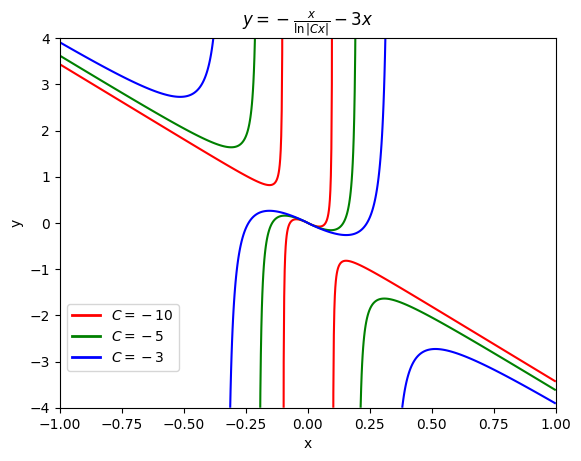

In [92]:
rangeX = (-1,1)
rangeY = (-4,4)
x = np.linspace(*rangeX, 1000)
y = np.linspace(*rangeY, 1000)
X,Y = np.meshgrid(x,y)
F = lambda C: -X/(np.log(np.abs(C*X)))-3*X - Y

contour1 = plt.contour(X, Y, bounds(F(-10), 10), [0], colors='red')
contour1 = plt.contour(X, Y, bounds(F(-5), 10), [0], colors='green')
contour1 = plt.contour(X, Y, bounds(F(-3), 10), [0], colors='blue')

legend_lines = [
    Line2D([0], [0], color='red', lw=2, label='$C=-10$'),
    Line2D([0], [0], color='green', lw=2, label='$C=-5$'),
    Line2D([0], [0], color='blue', lw=2, label='$C=-3$')
]

plt.xlabel("x")
plt.ylabel("y")
plt.title("$y=-\\frac{x}{\ln{|Cx|}}-3x$")
plt.legend(handles=legend_lines, loc='upper left', bbox_to_anchor=(0, 0.3))
plt.show()